In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('https://raw.githubusercontent.com/namanvashistha/doctor_strange/master/crime.csv')
data.head()

,Date,Latitude,Longitude,Magnitude
0,2017-02-06T20:11:14.000Z,38.894376,-76.997556,4
1,2017-06-03T12:54:27.000Z,38.906838,-77.058661,6
2,2017-04-07T00:00:00.000Z,38.960739,-77.018034,16
3,2017-05-31T11:39:56.000Z,38.905151,-77.063998,4
4,2017-07-30T00:00:00.000Z,38.949532,-77.020246,16


In [73]:
data.shape

(33116, 4)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33116 entries, 0 to 33115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33116 non-null  object 
 1   Latitude   33116 non-null  float64
 2   Longitude  33116 non-null  float64
 3   Magnitude  33116 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


No NULL values

In [75]:
data.Magnitude.unique()

array(['4', '6', '16', '12', '8', '10', '2', 'ARSON', '14'], dtype=object)

Let's consider only latitude & longitude

In [76]:
X = data.iloc[:,1:3].values

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [78]:
X

array([[-0.39983964,  0.25992315],
       [ 0.01229297, -1.42249481],
       [ 1.79487871, -0.30389552],
       ...,
       [ 0.4389443 , -0.72683353],
       [ 1.03514209,  0.90337563],
       [ 1.48679874, -0.46296732]])

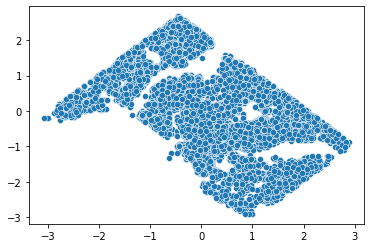

In [79]:
sns.scatterplot(X[:, 0], X[:, 1])
plt.show()

In [80]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

In [81]:
import random
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

In [82]:
cost_list = []

for k in range(1, 10):
  
  centroids, cluster = kmeans(X, k)
  
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)


In [83]:
cost_list

[41191.016202288556,
 28996.55487147419,
 25322.902394721874,
 21998.853679958276,
 18696.99721816036,
 17128.03328416236,
 15735.42738710541,
 14315.692360028255,
 13171.125170613966]

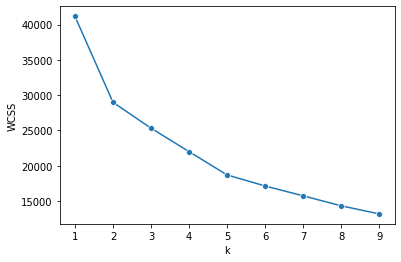

In [84]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [85]:
k = 5
centroids, cluster = kmeans(X, k)

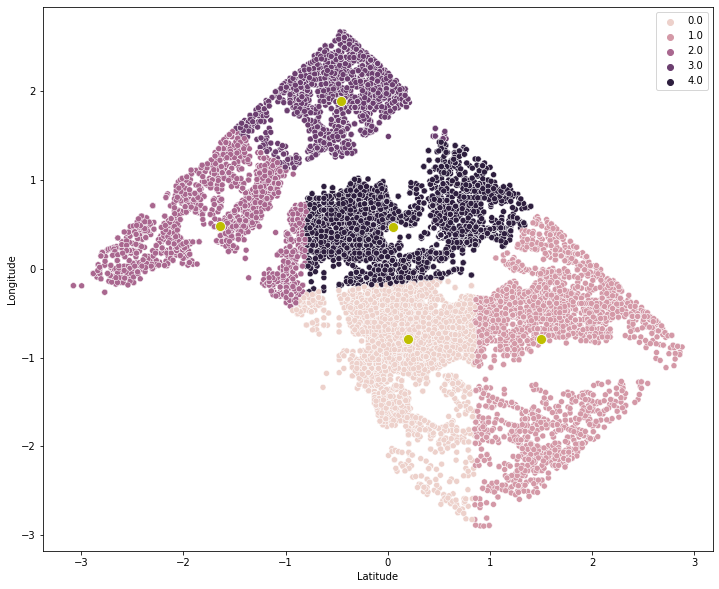

In [86]:
plt.figure(figsize=(12, 10))
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [87]:
k = 6
centroids, cluster = kmeans(X, k)

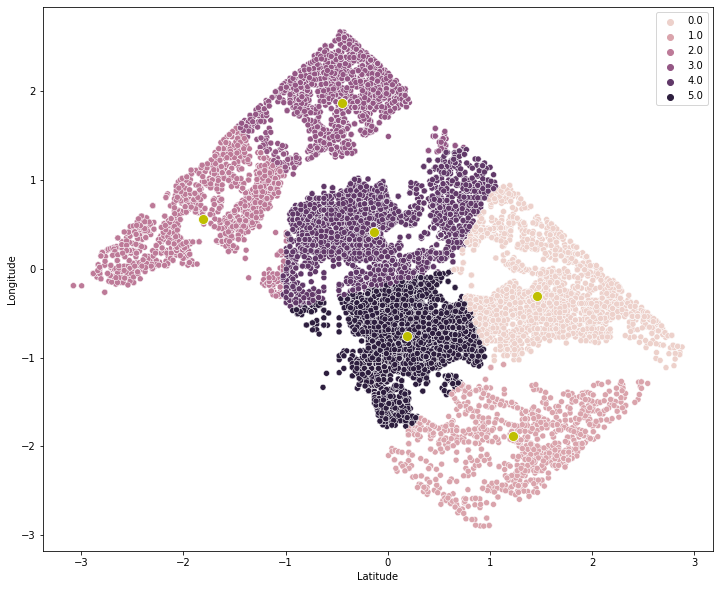

In [88]:
plt.figure(figsize=(12, 10))
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()